# JetRail Time series Forecasting

## Probleme Statement

"This investment would only make sense, if they can get more than 1 Million monthly users with in next 18 months. In order to help Unicorn Ventures in their decision, you need to forecast the traffic on JetRail for the next 7 months." 

## Hypothesis Generation 

Here are some factors which might affect the passengers number on the JetRail. 

- Population has a general upward trend with time and more people to travel by JetRail. So there will be an increase in the traffic as the years pass by

- The traffic will be high from May to October: because tourists visits generally increases during this time period.

- Traffic on weekdays will be more as compared to weekends/holidays: All the people will go to office on weekdays then the traffic will be more

- Traffic during the peak hours will be high: as people will travel to work and college.

In [158]:
## Loading modules 
import pandas as pd          
import seaborn as sns
sns.set()
import numpy as np          # For mathematical calculations 
import matplotlib.pyplot as plt  # For plotting graphs 
from datetime import datetime    # To access datetime 
from pandas import Series        # To work on series 
%matplotlib inline 
import warnings                   # To ignore the warnings warnings.filterwarnings("ignore")
## Data 
#We will load the new resampled datasets "train_processed.csv" and "test_processed.csv"
## Reading the data 
train=pd.read_csv("train_processed.csv") 
test= pd.read_csv("test_processed.csv")
#Let's make a copy of the files to keep the original datasets unchanged 
train_original=train.copy() 
test_original=test.copy()


In [159]:
train['Datetime'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
test['Datetime'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 


In [160]:
train.head()

,ID,Datetime,Count,year,month,day,Hour,Day,Weekend
0,0,2012-08-25 00:00:00,8,2012,8,25,0,5,1
1,1,2012-08-25 01:00:00,2,2012,8,25,1,5,1
2,2,2012-08-25 02:00:00,6,2012,8,25,2,5,1
3,3,2012-08-25 03:00:00,2,2012,8,25,3,5,1
4,4,2012-08-25 04:00:00,2,2012,8,25,4,5,1


### Resampling (Here downsampling)


It involves an aggregation operation ( Here it is computing daily count from the original hourly time series)

So which kind of time series will we work on ? Hourly ? Daily? Monthly ? 
Let's take a quick look on the plots !

In [161]:
train=train.drop('ID',1)

In [162]:
# Create a timestamp to convert the index to datetime
train['Timestamp'] = pd.to_datetime(train.Datetime,format='%d-%m-%Y %H:%M') 
train.index = train.Timestamp 

In [163]:
# Hourly time series 
hourly = train.resample('H').mean() 
# Converting to daily mean 
daily = train.resample('D').mean() 
# Converting to weekly mean 
weekly = train.resample('W').mean() 
# Converting to monthly mean 
monthly = train.resample('M').mean()

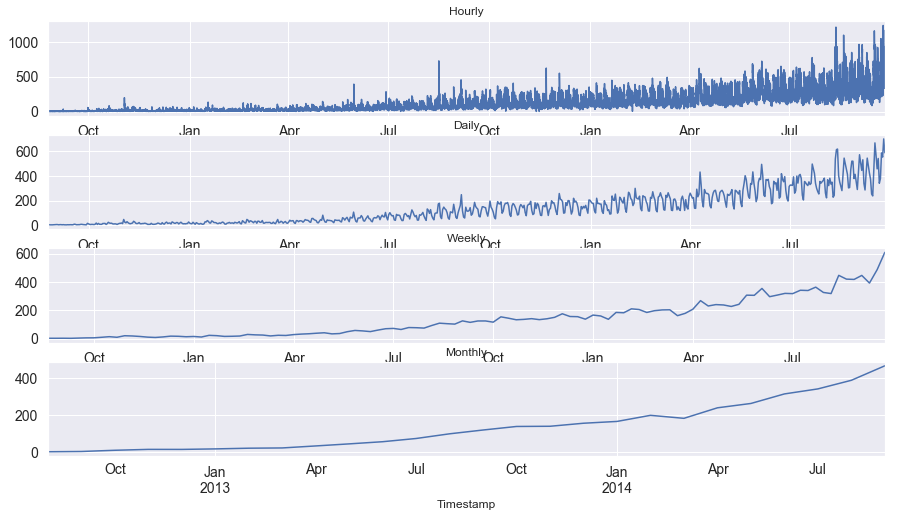

In [164]:
fig, axs = plt.subplots(4,1) 
hourly.Count.plot(figsize=(15,8), title= 'Hourly', fontsize=14, ax=axs[0]) 
daily.Count.plot( title= 'Daily', fontsize=14, ax=axs[1]) 
weekly.Count.plot(title= 'Weekly', fontsize=14, ax=axs[2]) 
monthly.Count.plot( title= 'Monthly', fontsize=14, ax=axs[3]) 
plt.show()

We notice that the time series are more stable when aggregating them on daily, weekly and monthly basis.

We chose work on the daily time series as we only need to remove noise.

In [95]:
### Resampling the train and test datasets to daily time series 

In [165]:
# Converting to daily mean 
train = train.resample('D').mean()

test['Timestamp'] = pd.to_datetime(test.Datetime,format='%d-%m-%Y %H:%M') 
test.index = test.Timestamp  

# Converting to daily mean 
test = test.resample('D').mean() 

## Model building 

We will divide the train dataset into two parts. One part is used to train the model and the other part is used as the validation dataset to check the accuracy of the predictions.

- Now we will split the data into training and validation part: so we will pick the last 3 months as the validation data because the trend will be the most in them.
- We did not choose randomly the train and validation data, because it is time related. So it will be like, predicting old values based on future values which is not right actually.

In [166]:
Train=train.loc['2012-08-25':'2014-06-24'] 
Valid=train.loc['2014-06-25':'2014-09-25']

Let's plot the train and validation time series 

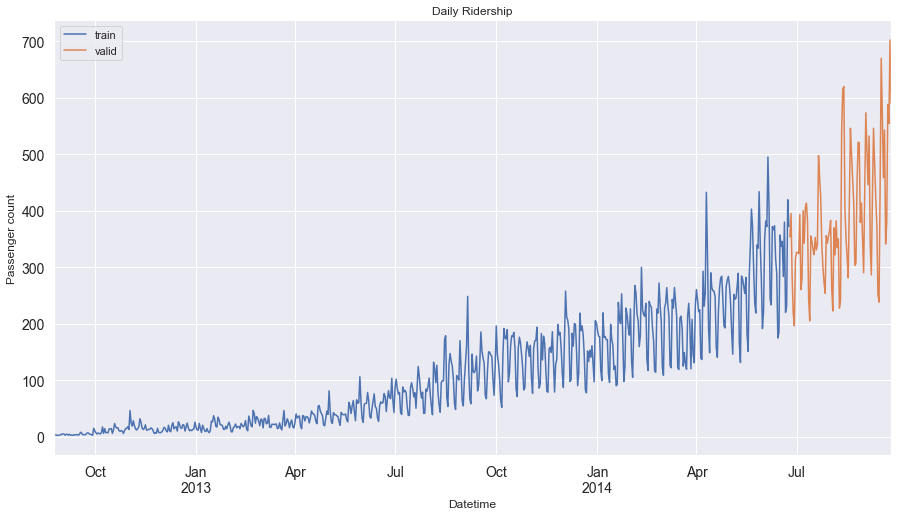

In [167]:
Train.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='train') 
Valid.Count.plot(figsize=(15,8), title= 'Daily Ridership', fontsize=14, label='valid') 
plt.xlabel("Datetime") 
plt.ylabel("Passenger count") 
plt.legend(loc='best') 
plt.show()


The blue part represents the train data and the orange part represents the validation data.

We will predict the traffic for the validation part and visualize the accuracy of the predictions. 
We will then make predictions for the test dataset.

Let's try a bunch of models and discusss their accuracy.

We will calculate the rmse (Root Mean Square Error) to check the accuracy, which is the standard deviation of the residuals. Residuals are a measure of how far from the regression line data points are.

## Moving average 

We will take the average of the passenger counts for last few time days

Lets try the rolling mean for the last 10, 20, 50 days and visualize the results.

### 10 days

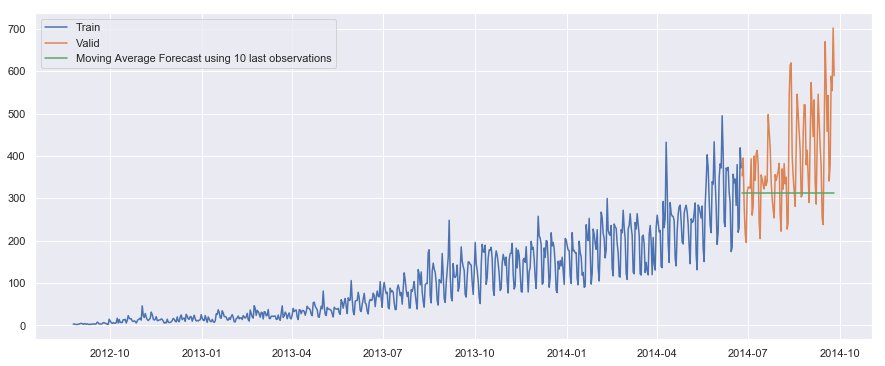

In [168]:
Valid_avg = Valid.copy() 
Valid_avg['moving_avg'] = Train['Count'].rolling(10).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,6)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(Valid_avg['moving_avg'], label='Moving Average Forecast using 10 last observations') 
plt.legend(loc='best') 
plt.show() 


### 20 days

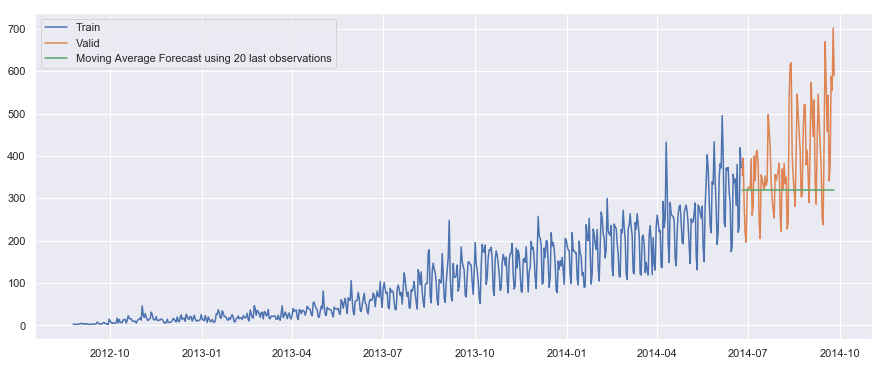

In [170]:

Valid_avg = Valid.copy() 
Valid_avg['moving_avg'] = Train['Count'].rolling(20).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,6)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(Valid_avg['moving_avg'], label='Moving Average Forecast using 20 last observations') 
plt.legend(loc='best') 
plt.show() 


### 50 days

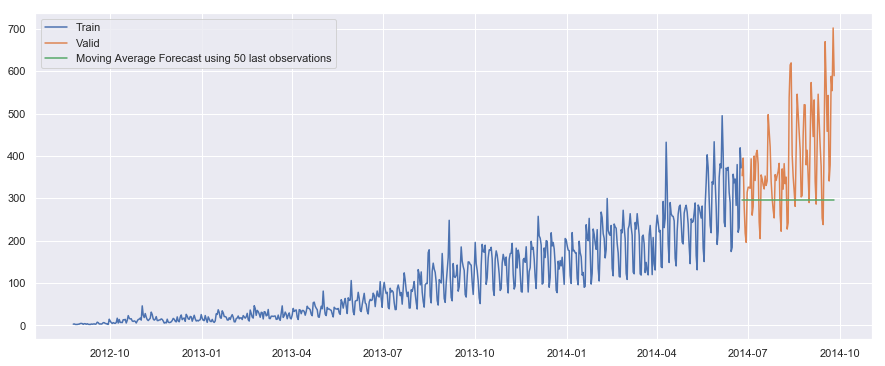

In [171]:
Valid_avg = Valid.copy() 
Valid_avg['moving_avg'] = Train['Count'].rolling(50).mean().iloc[-1] # average of last 10 observations. 
plt.figure(figsize=(15,6)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(Valid_avg['moving_avg'], label='Moving Average Forecast using 50 last observations') 
plt.legend(loc='best') 
plt.show() 


In [172]:
# The predictions are getting weaker as we increase the number of observations.

from sklearn.metrics import mean_squared_error 
from math import sqrt 

rms = sqrt(mean_squared_error(Valid.Count, Valid_avg['moving_avg'])) 
print(rms)



144.19175679986802


Let's try another technique to reduce the rmse value

## Holt’s Linear Trend Model

 It is an extension of simple exponential smoothing to allow forecasting of data with a trend.
 ### This technique takes into account the trend of the dataset. 

Let's visualize the trend, seasonality and error in the series.

We can decompose the time series in four parts:

- Observed, which is the original time series.
- Trend, which shows the trend in the time series (increasing or decreasing behaviour of the time series)
- Seasonal, which tells us about the seasonality in the time series.
- Residual, which is obtained by removing any trend or seasonality in the time series.

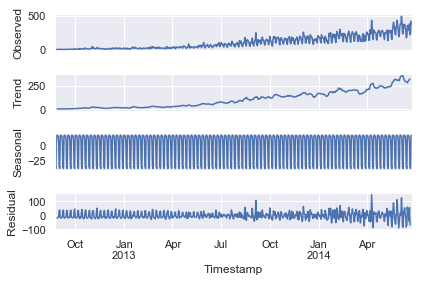

In [119]:
import statsmodels.api as sm 

sm.tsa.seasonal_decompose(Train.Count).plot() 
result = sm.tsa.stattools.adfuller(Train.Count) 
plt.show()

We can see an increasing trend, so now we will make a model based on the trend.

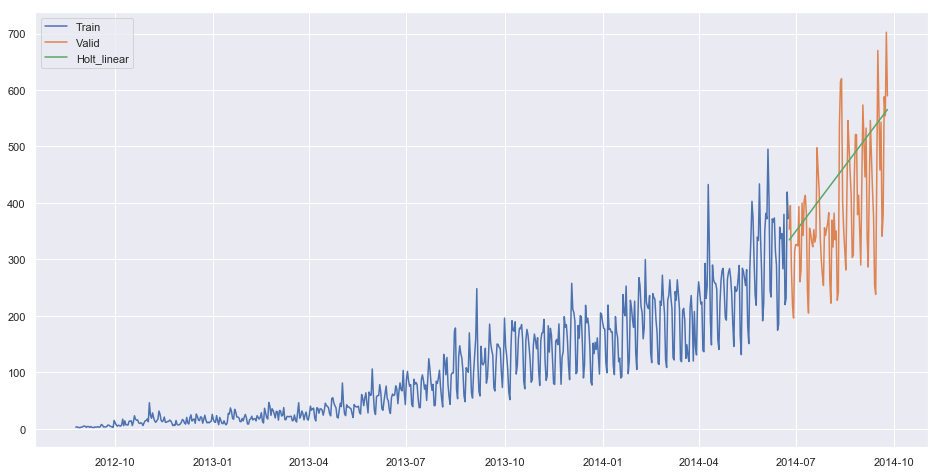

In [175]:
from statsmodels.tsa.api import Holt 

Valid_ltm = Valid.copy() 
holt = Holt(np.asarray(Train['Count'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1) 
Valid_ltm['Holt_linear'] = holt.forecast(len(Valid)) 
plt.figure(figsize=(16,8)) 
plt.plot(Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(Valid_ltm['Holt_linear'], label='Holt_linear') 
plt.legend(loc='best') 
plt.show()

Wa notice that the line took into consideration the trend of the time series.

In [177]:
rms = sqrt(mean_squared_error(Valid.Count, Valid_ltm.Holt_linear)) 
print(rms)

112.94278345314041


The rmse has decreased.

### For this case, we need a method that takes into account trend and seasonality so we will try Holt's Winter technique


## Holt winter’s model 

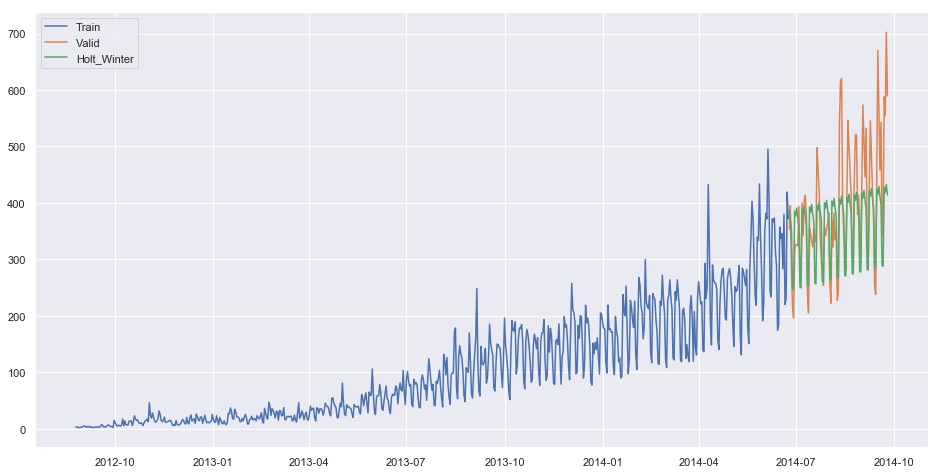

In [178]:
from statsmodels.tsa.api import ExponentialSmoothing

Valid_holtw = Valid.copy() 
holtw = ExponentialSmoothing(np.asarray(Train['Count']) ,seasonal_periods=7 ,trend='add', seasonal='add',).fit() 
valid_holtw['Holt_Winter'] = holtw.forecast(len(Valid)) 
plt.figure(figsize=(16,8)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(valid_holtw['Holt_Winter'], label='Holt_Winter') 
plt.legend(loc='best') 
plt.show()


In [129]:
rms = sqrt(mean_squared_error(Valid.Count, valid_holtw.Holt_Winter)) 
print(rms)


82.37527095912128


The rmse value improved a lot from this model

## ARIMA Model

Let's try also a model which consider both the trend and seasonality of the time series: ARIMA model (Auto Regression Integrated Moving Average)

We have to make sure that the time series is stationary. If it's not, we will make it stationary, that means that we need to remove the trend and seasonality from the data

### Checking Stationarity of the series

We will use Dickey Fuller:
The null hypothesis of the test is that time series is not stationary.
The alternate hypothesis (rejecting the null hypothesis and when the test statistic is less than the critical value) is that the time series is stationary.

In [130]:
from statsmodels.tsa.stattools import adfuller 

dftest = adfuller(train_original['Count'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)


from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10



Test Statistic                    -4.456561
p-value                            0.000235
#Lags Used                        45.000000
Number of Observations Used    18242.000000
Critical Value (1%)               -3.430709
Critical Value (5%)               -2.861698
Critical Value (10%)              -2.566854
dtype: float64


The statistics shows that the time series is stationary because Test Statistic < Critical value but we can see an increasing trend in the data.
We need to remove the trend and seasonality from the data to make them more stationary

### Removing Trend

We talk about trend when we notice a long-term increase or decrease in the data. Here we can apply log transormation as we see an increasing trend in the data
We will use rolling average (window size of 24h per day)

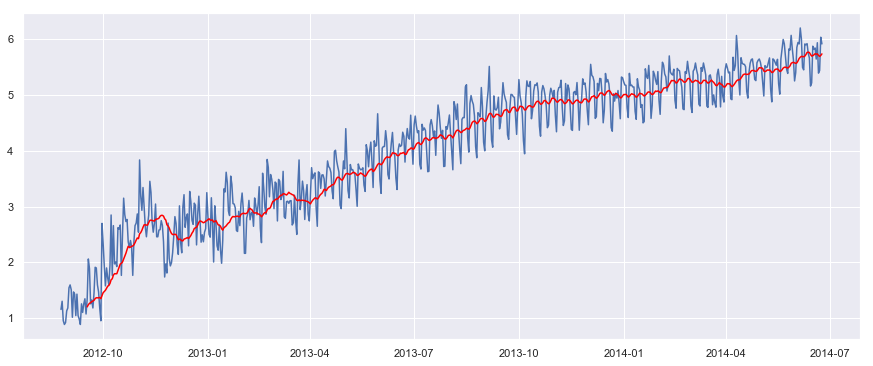

In [138]:
Train_log = np.log(Train['Count']) 
Valid_log = np.log(Valid['Count'])

moving_avg = Train_log.rolling(24).mean()

plt.figure(figsize=(15,6)) 

plt.plot(Train_log) 

plt.plot(moving_avg, color = 'red') 
plt.show()



So we can observe an increasing trend. Now we will remove this increasing trend to make our time series stationary.



In [139]:
train_log_moving_avg_diff = Train_log - moving_avg


Since we took the average of 24 values, rolling mean is not defined for the first 23 values. So let’s drop those null values.


In [141]:
train_log_moving_avg_diff.dropna(inplace = True) 


Test Statistic                -5.861646e+00
p-value                        3.399422e-07
#Lags Used                     2.000000e+01
Number of Observations Used    6.250000e+02
Critical Value (1%)           -3.440856e+00
Critical Value (5%)           -2.866175e+00
Critical Value (10%)          -2.569239e+00
dtype: float64


We can see that the Test Statistic is very smaller as compared to the Critical Value. So the trend is almost removed.

Let’s now stabilize the mean of the time series which is also a requirement for a stationary time series.

Differencing can help to make the series stable and eliminate the trend.



In [144]:
train_log_diff = Train_log - Train_log.shift(1) 

dftest = adfuller(train_log_diff.dropna(), autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)


from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10



Test Statistic                -8.237568e+00
p-value                        5.834049e-13
#Lags Used                     1.900000e+01
Number of Observations Used    6.480000e+02
Critical Value (1%)           -3.440482e+00
Critical Value (5%)           -2.866011e+00
Critical Value (10%)          -2.569151e+00
dtype: float64


Now we will decompose the time series into trend and seasonality and will get the residual which is the random variation in the series.

### Removing Seasonality

By seasonality, we mean periodic fluctuations. A seasonal pattern exists when a series is influenced by seasonal factors (e.g., the quarter of the year, the month, or day of the week).
Seasonality is always of a fixed and known period.
We will use seasonal decompose to decompose the time series into trend, seasonality and residuals.

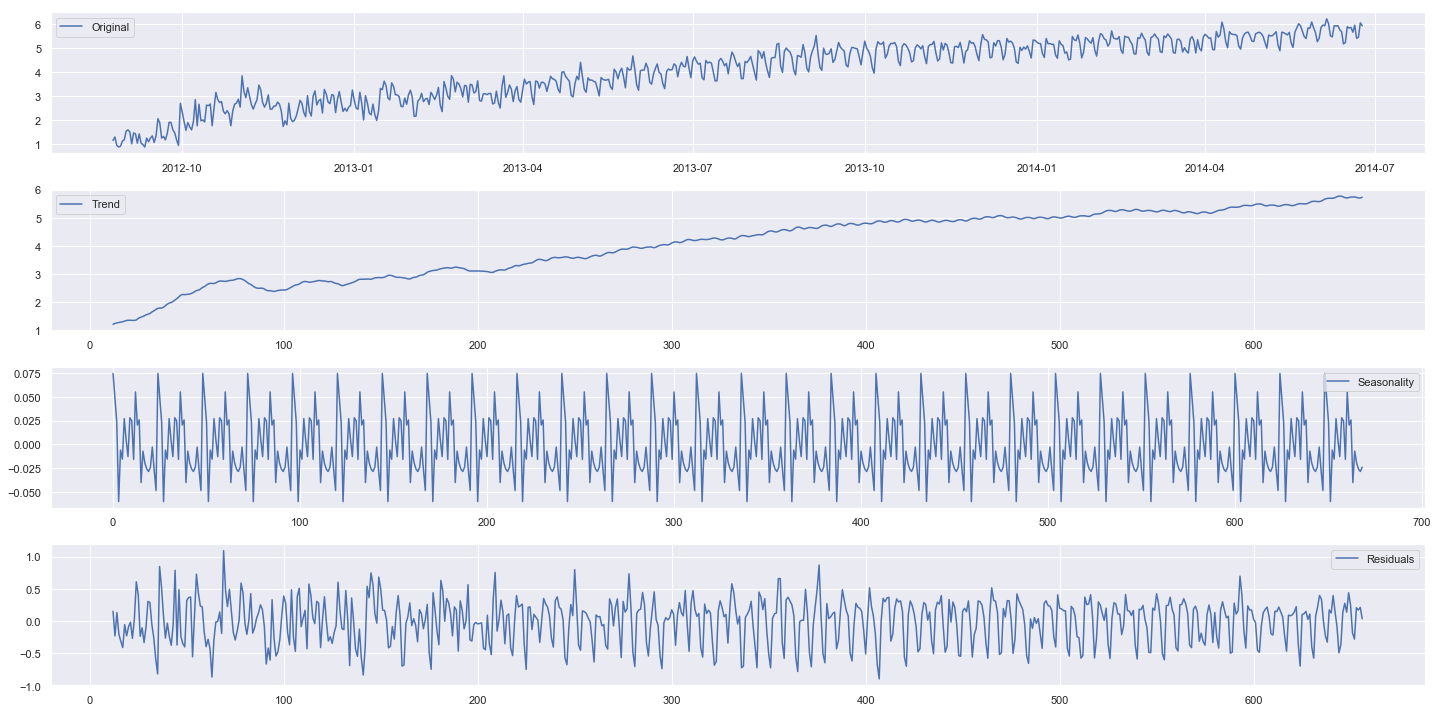

In [145]:
from statsmodels.tsa.seasonal import seasonal_decompose 

decomposition = seasonal_decompose(pd.DataFrame(Train_log).Count.values, freq = 24) 

trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid 

plt.subplot(411) 
plt.plot(Train_log, label='Original') 
plt.legend(loc='best') 
plt.subplot(412) 
plt.plot(trend, label='Trend') 
plt.legend(loc='best') 
plt.subplot(413) 
plt.plot(seasonal,label='Seasonality') 
plt.legend(loc='best') 
plt.subplot(414) 
plt.plot(residual, label='Residuals') 
plt.legend(loc='best') 
plt.tight_layout() 
plt.show()

We can see the trend, residuals and the seasonality clearly in the above graph. Seasonality shows a constant trend in counter.

Let’s check stationarity of residuals.

In [185]:
train_log_decompose = pd.DataFrame(residual) 
train_log_decompose['date'] = Train_log.index 
train_log_decompose.set_index('date', inplace = True) 
train_log_decompose.dropna(inplace=True) 

dftest = adfuller(train_log_decompose[0], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print (dfoutput)


from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10



Test Statistic                -7.822096e+00
p-value                        6.628321e-12
#Lags Used                     2.000000e+01
Number of Observations Used    6.240000e+02
Critical Value (1%)           -3.440873e+00
Critical Value (5%)           -2.866183e+00
Critical Value (10%)          -2.569243e+00
dtype: float64


It can be interpreted from the results that the residuals are stationary.

Now we will forecast the time series using different models.

## Forecast with ARIMA

First of all we will fit the ARIMA model on our time series for that we have to find the optimized values for the p,d,q parameters.

To find the optimized values of these parameters, we will use ACF(Autocorrelation Function) and PACF(Partial Autocorrelation Function) graph.

ACF is a measure of the correlation between the TimeSeries with a lagged version of itself.

PACF measures the correlation between the TimeSeries with a lagged version of itself but after eliminating the variations 

In [186]:
from statsmodels.tsa.stattools import acf, pacf 
# train_log_diff = Train_log - Train_log.shift(1) 
lag_acf = acf(train_log_diff.dropna(),nlags=25) 
lag_pacf = pacf(train_log_diff.dropna(),nlags=25, method='ols')

### ACF and PACF plot



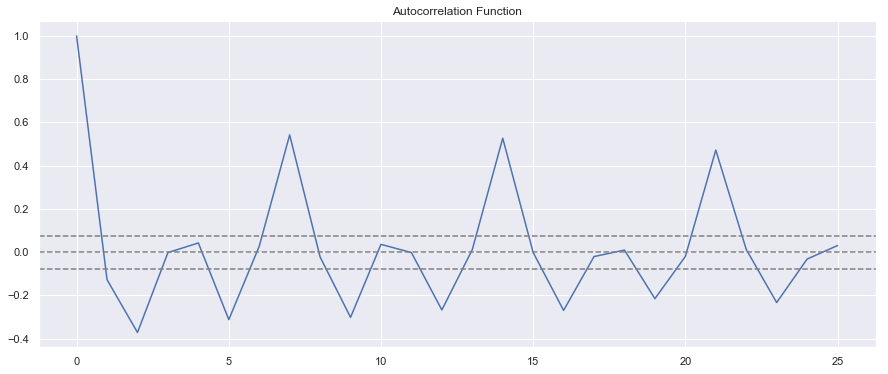

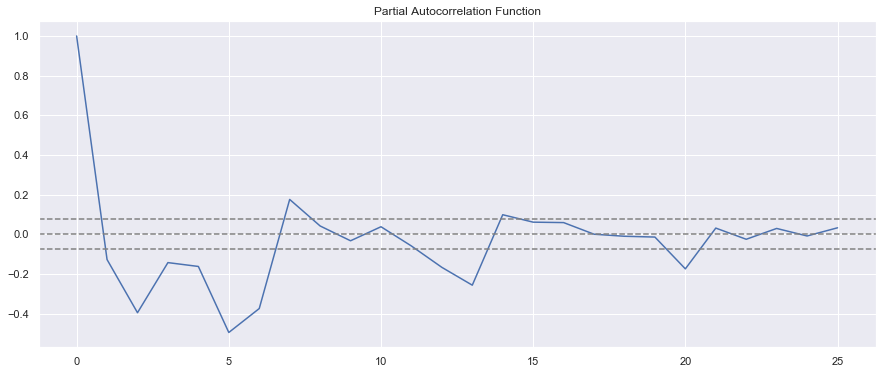

In [154]:
plt.figure(figsize=(15,6)) 
plt.plot(lag_acf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.title('Autocorrelation Function') 
plt.show() 
plt.figure(figsize=(15,6)) 

plt.plot(lag_pacf) 
plt.axhline(y=0,linestyle='--',color='gray') 
plt.axhline(y=-1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray') 
plt.axhline(y=1.96/np.sqrt(len(train_log_diff.dropna())),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function') 
plt.show()

p value is the lag value where the PACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case p=1.

q value is the lag value where the ACF chart crosses the upper confidence interval for the first time. It can be noticed that in this case q=1.

Now we will make the ARIMA model as we have the p,q values. We will make the AR and MA model separately and then combine them together.

d is the degree of differencing 

### AR model



The autoregressive model specifies that the output variable depends linearly on its own previous values.

Here we found p=1 and q=1

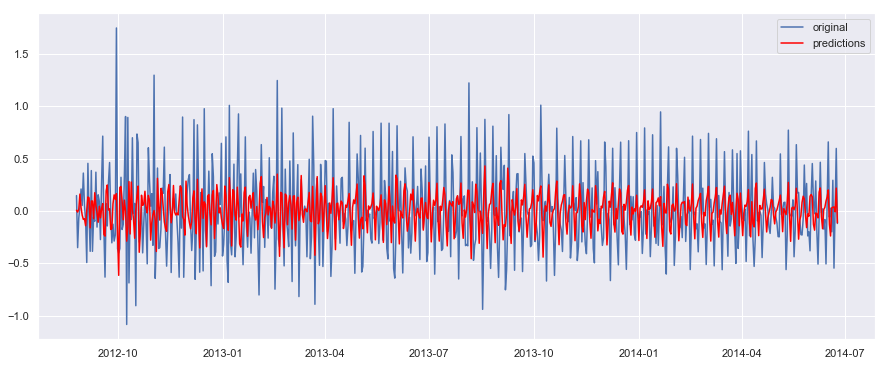

In [157]:
from statsmodels.tsa.arima_model import ARIMA
plt.figure(figsize=(15,6)) 

model = ARIMA(Train_log, order=(2, 1, 0))  # here the q value is zero since it is the AR model 
results_AR = model.fit(disp=-1)  
plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_AR.fittedvalues, color='red', label='predictions') 
plt.legend(loc='best') 
plt.show()

Plot of the validation curve for AR model.


We have to change the scale of the model to the original scale.

First step would be to store the predicted results as a separate series and observe it.


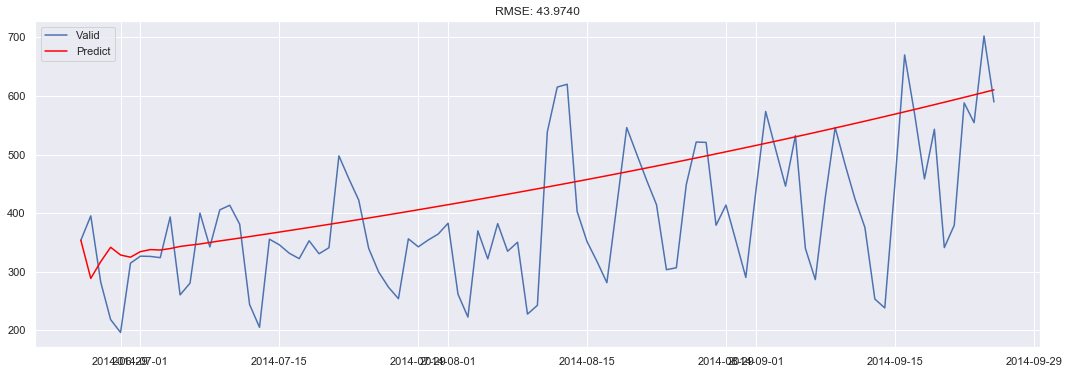

In [193]:
AR_predict=results_AR.predict(start="2014-06-25", end="2014-09-25") 
AR_predict=AR_predict.cumsum().shift().fillna(0) 
AR_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = Valid.index) 
AR_predict1=AR_predict1.add(AR_predict,fill_value=0) 
AR_predict = np.exp(AR_predict1)

plt.figure(figsize=(18,6)) 

plt.plot(Valid['Count'], label = "Valid") 
plt.plot(AR_predict, color = 'red', label = "Predict") 
plt.legend(loc= 'best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(AR_predict, valid['Count']))/valid.shape[0])) 
plt.show()

The red line shows the prediction for the validation set.

### MA Model

The moving-average model specifies that the output variable depends linearly on the current and various past values of a stochastic (imperfectly predictable) term.


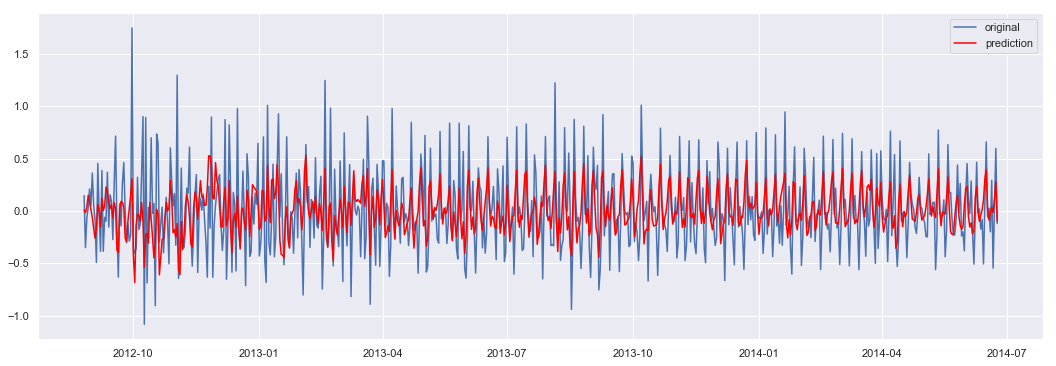

In [197]:

model = ARIMA(Train_log, order=(0, 1, 2))  # here the p value is zero since it is the MA model 
results_MA = model.fit(disp=-1)  

plt.figure(figsize=(18,6)) 

plt.plot(train_log_diff.dropna(), label='original') 
plt.plot(results_MA.fittedvalues, color='red', label='prediction') 
plt.legend(loc='best') 
plt.show()

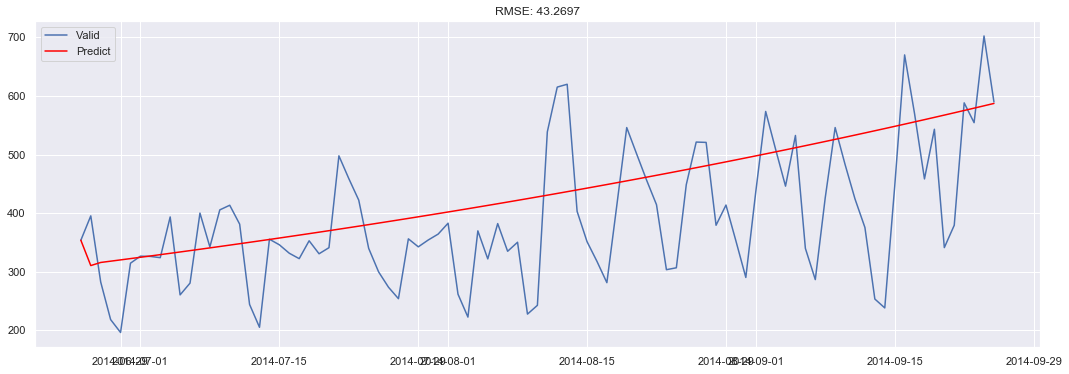

In [198]:
MA_predict=results_MA.predict(start="2014-06-25", end="2014-09-25") 
MA_predict=MA_predict.cumsum().shift().fillna(0) 
MA_predict1=pd.Series(np.ones(valid.shape[0]) * np.log(valid['Count'])[0], index = valid.index) 
MA_predict1=MA_predict1.add(MA_predict,fill_value=0) 
MA_predict = np.exp(MA_predict1)

plt.figure(figsize=(18,6)) 

plt.plot(valid['Count'], label = "Valid") 
plt.plot(MA_predict, color = 'red', label = "Predict") 
plt.legend(loc='best') 
plt.title('RMSE: %.4f'% (np.sqrt(np.dot(MA_predict, valid['Count']))/valid.shape[0])) 
plt.show()

### Combined model

Combination of the two models

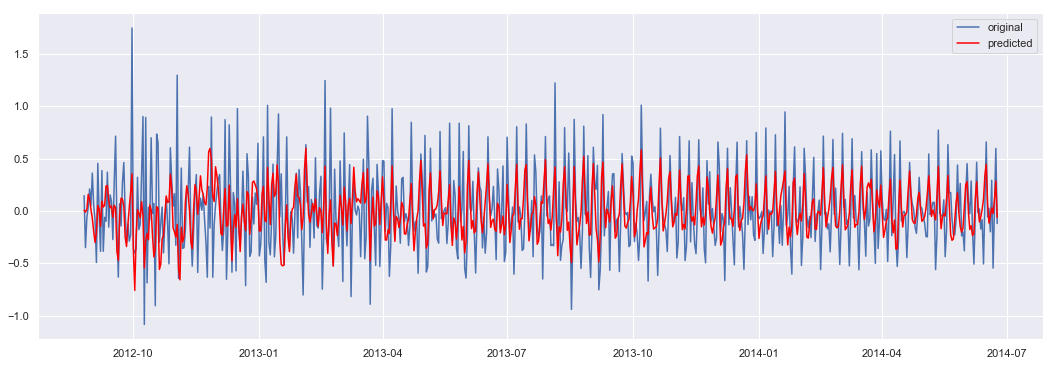

In [201]:
model = ARIMA(Train_log, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  

plt.figure(figsize=(18,6)) 

plt.plot(train_log_diff.dropna(),label='original') 
plt.plot(results_ARIMA.fittedvalues, color='red', label='predicted') 
plt.legend(loc='best') 
plt.show()

Here is a function which can be used to change the scale of the model to the original scale.


In [202]:

def check_prediction_diff(predict_diff, given_set):
    predict_diff= predict_diff.cumsum().shift().fillna(0)
    predict_base = pd.Series(np.ones(given_set.shape[0]) * np.log(given_set['Count'])[0], index = given_set.index)
    predict_log = predict_base.add(predict_diff,fill_value=0)
    predict = np.exp(predict_log)

    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()


def check_prediction_log(predict_log, given_set):
    predict = np.exp(predict_log)
 
    plt.plot(given_set['Count'], label = "Given set")
    plt.plot(predict, color = 'red', label = "Predict")
    plt.legend(loc= 'best')
    plt.title('RMSE: %.4f'% (np.sqrt(np.dot(predict, given_set['Count']))/given_set.shape[0]))
    plt.show()


Let’s predict the values for validation set.


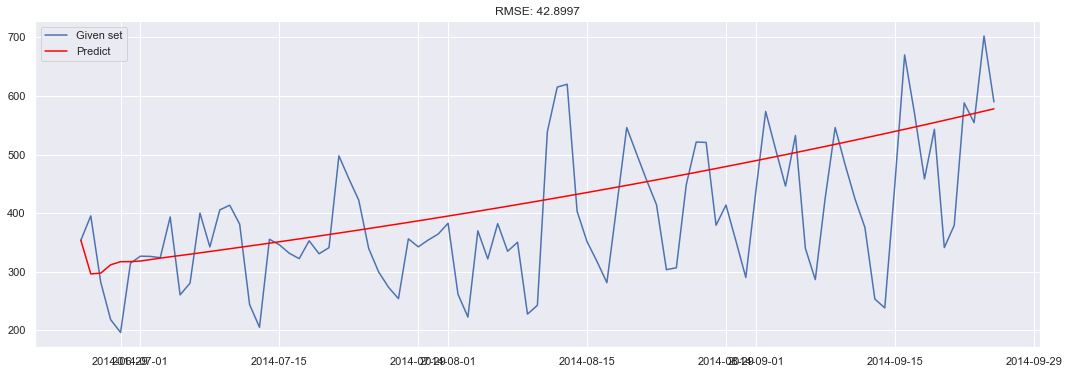

In [204]:

ARIMA_predict_diff=results_ARIMA.predict(start="2014-06-25", end="2014-09-25")
plt.figure(figsize=(18,6)) 

check_prediction_diff(ARIMA_predict_diff, valid)

### SARIMA Model

This model takes into account the seasonality of the time series.

/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


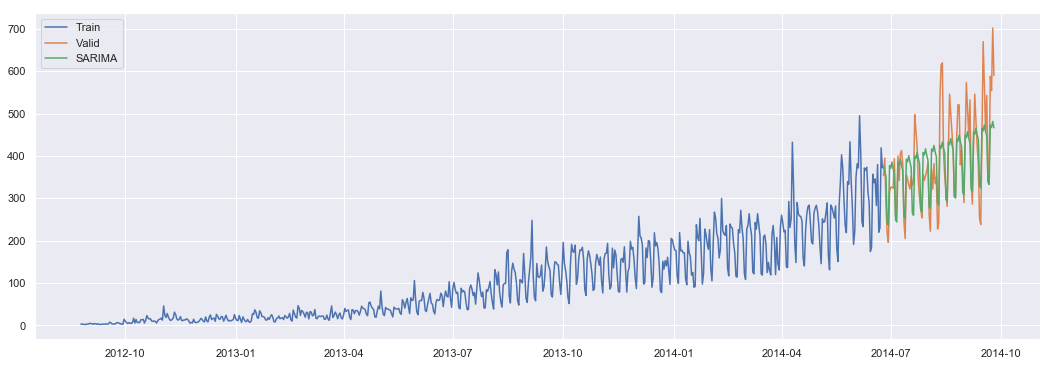

In [208]:
import statsmodels.api as sm

y_hat_avg = Valid.copy() 
fit1 = sm.tsa.statespace.SARIMAX(Train.Count, order=(2, 1, 4),seasonal_order=(0,1,1,7)).fit() 
y_hat_avg['SARIMA'] = fit1.predict(start="2014-6-25", end="2014-9-25", dynamic=True) 
plt.figure(figsize=(18,6)) 
plt.plot( Train['Count'], label='Train') 
plt.plot(Valid['Count'], label='Valid') 
plt.plot(y_hat_avg['SARIMA'], label='SARIMA') 
plt.legend(loc='best') 
plt.show()



The order in the parameters of the SARIMA model is the value of the autoregressive model(number of time lags), the degree of differencing(number of times the data have had past values subtracted) and the order of moving average model.

Seasonal order represents the order of the seasonal component of the model for the AR parameters, differences, MA parameters, and periodicity.

In this case the periodicity is 7 since it is daily time series and will repeat after every 7 days.

Validation part: let's check the rmse value.


In [209]:

rms = sqrt(mean_squared_error(valid.Count, y_hat_avg.SARIMA)) 
print(rms)



69.76036366955455
